In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [23]:
import eos
import numpy as np
import matplotlib.pyplot as plt

# path and filename settings
proj_path = '/home/bobeth/Work/digethic-AI-course/eos'
data_path = 'data'
data_mcmc_file_name = 'fit-SM-Vcb-mcmc.csv'
data_pmc_file_name  = 'fit-SM-Vcb-pmc.csv'

# MCMC parameters
mcmc_N_chains = 20
mcmc_preruns = 10
mcmc_pre_N = 3000
mcmc_N = 10000
mcmc_stride = 4

# hierarchical clustering
hc_r_crit = 1.3
hc_K_g = 5

# PMC parameters
pmc_step_N = 30000
pmc_steps = 15
pmc_final_N = 400000

# Define Analysis
General arguments for analysis

In [2]:
from eos_analysis_args import analysis_args

### Fit of form factor (FF) parameters from theory constraints only

In [3]:
th_analysis = eos.Analysis(**analysis_args)

th_analysis.parameters['B(*)->D(*)::n_f@HQET'].set(2.0)
th_analysis.parameters['B(*)->D(*)::a@HQET'].set(1.0)
#th_analysis.parameters['mass::B_d'].set(5.27942)
#th_analysis.parameters['mass::D_u'].set(1.86723)
#th_analysis.parameters['mass::D_u^*'].set(2.01000)
th_analysis.parameters['B_s(*)->D_s(*)::n_s@HQET'].set(1.0)
th_analysis.parameters['B_s(*)->D_s(*)::a@HQET'].set(1.0)
#th_analysis.parameters['mass::B_s'].set(5.36688)
#th_analysis.parameters['mass::D_u'].set(1.96834)
#th_analysis.parameters['mass::D_u^*'].set(2.1122)

# start point
##
## LP
th_analysis.parameters[    "B(*)->D(*)::xi'(1)@HQET"].set( -1.15)
th_analysis.parameters[   "B(*)->D(*)::xi''(1)@HQET"].set( +2.02)
th_analysis.parameters[  "B(*)->D(*)::xi'''(1)@HQET"].set( -3.90)
##
## SLP
th_analysis.parameters[  "B(*)->D(*)::chi_2(1)@HQET"].set( -0.07)
th_analysis.parameters[ "B(*)->D(*)::chi_2'(1)@HQET"].set( -0.02)
th_analysis.parameters["B(*)->D(*)::chi_2''(1)@HQET"].set( -0.01)
##
th_analysis.parameters[ "B(*)->D(*)::chi_3'(1)@HQET"].set( +0.04)
th_analysis.parameters["B(*)->D(*)::chi_3''(1)@HQET"].set( -0.11)
##
th_analysis.parameters[    "B(*)->D(*)::eta(1)@HQET"].set( +0.64)
th_analysis.parameters[   "B(*)->D(*)::eta'(1)@HQET"].set( +0.06)
th_analysis.parameters[  "B(*)->D(*)::eta''(1)@HQET"].set( -0.52)
##
## SSLP
th_analysis.parameters[    "B(*)->D(*)::l_1(1)@HQET"].set( +0.17)
th_analysis.parameters[   "B(*)->D(*)::l_1'(1)@HQET"].set( -5.80)
##
th_analysis.parameters[    "B(*)->D(*)::l_2(1)@HQET"].set( -1.60)
th_analysis.parameters[   "B(*)->D(*)::l_2'(1)@HQET"].set( -3.73)
##
th_analysis.parameters[    "B(*)->D(*)::l_3(1)@HQET"].set( -3.52)
th_analysis.parameters[   "B(*)->D(*)::l_3'(1)@HQET"].set( +5.12)
##
th_analysis.parameters[    "B(*)->D(*)::l_4(1)@HQET"].set( -2.33)
th_analysis.parameters[   "B(*)->D(*)::l_4'(1)@HQET"].set( -0.72)
##
th_analysis.parameters[    "B(*)->D(*)::l_5(1)@HQET"].set( +3.04)
th_analysis.parameters[   "B(*)->D(*)::l_5'(1)@HQET"].set( +0.18)
##
th_analysis.parameters[    "B(*)->D(*)::l_6(1)@HQET"].set( +2.33)
th_analysis.parameters[   "B(*)->D(*)::l_6'(1)@HQET"].set( +0.70)
##
th_analysis.parameters['CKM::abs(V_cb)'].set( 40.0e-3)
th_analysis.parameters['CKM::arg(V_cb)'].set( 0.0)

INFO:EOS:Creating analysis with 23 priors, 8 EOS-wide constraints, 7 global options, 6 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 15 parameter(s) that do not appear in the prior; check prior?


### Fit of FF parameters and WET Wilson coefficients from theory + experimental constraints

In [4]:
analysis_args['likelihood'].append('B^0->(Dpi)^+l^-nubar::KinematicDistributionsAngularObservables@BBGJvD:2021A')
analysis_args['priors'].extend([
    # CKM element
    { 'parameter':         "CKM::abs(V_cb)",   'min':  30.0e-3, 'max':  50.0e-3,  'type': 'uniform' }
])

exp_analysis = eos.Analysis(**analysis_args)
##
exp_analysis.parameters['CKM::abs(V_cb)'].set(40.0e-3)
exp_analysis.parameters['CKM::arg(V_cb)'].set(0.0)
##
exp_analysis.parameters[  "cbenue::Re{cVL}"].set(1.00)
##
exp_analysis.parameters["cbmunumu::Re{cVL}"].set(1.00)

INFO:EOS:Creating analysis with 24 priors, 9 EOS-wide constraints, 7 global options, 6 manually-entered constraints and 0 fixed parameters.
ERROR:EOS:[ConcreteObservableEntry.make] Observable 'B->D^*lnu::BR_CP_specific' forces option key 'I' to value '1/2', overriding user-provided value '1/2'
@1642019648: [ERROR [ConcreteObservableEntry.make]ERROR:EOS:[ConcreteObservableEntry.make] Observable 'B->D^*lnu::BR_CP_specific' forces option key 'U' to value 'c', overriding user-provided value 'c'
] Observable 'B->D^*lnu::BR_CP_specific' forces option key 'I' to value '1/2', overriding user-provided value '1/2'
@1642019648: [ERROR [ConcreteObservableEntry.make]] ERROR:EOS:[ConcreteObservableEntry.make] Observable 'B->D^*lnu::BR_CP_specific' forces option key 'I' to value '1/2', overriding user-provided value '1/2'
Observable 'B->D^*lnu::BR_CP_specific' forces option key 'U' to value 'c', overriding user-provided value 'c'
@1642019648: [ERROR [ConcreteObservableEntry.make]] ERROR:EOS:[Concrete

# Goodness-of-fit (GOF) without Markov Chains
Only from theory constraints on FF's:

In [5]:
%time th_analysis.optimize()
%time th_analysis.goodness_of_fit()

CPU times: user 8.23 s, sys: 7.73 s, total: 16 s
Wall time: 4.28 s
CPU times: user 525 µs, sys: 417 µs, total: 942 µs
Wall time: 286 µs


constraint,χ2,d.o.f.
B(*)->D(*)::chi_2'(1),0.0000,1
B(*)->D(*)::chi_2(1),0.0000,1
B(*)->D(*)::chi_3'(1),0.0000,1
B(*)->D(*)::eta'(1),0.0213,1
B(*)->D(*)::eta(1),0.0492,1
B->D::f_++f_0@FNAL+MILC:2015B,3.6995,7
B->D::f_++f_0@HPQCD:2015A,3.1833,5
B->D::f_T/f_+,0.0031,1
"B->D^(*)::FormFactors[f_+,f_0,A_0,A_1,A_2,V,T_1,T_2,T_23]@GKvD:2018A",2.9590,33
B->D^*::A_1[s_max]@HFLAV:2019A,0.0104,1


initialize experimental analysis with **best-fit point** (BFP) from theory-only FF fit:

In [6]:
for p in th_analysis.parameters:
    exp_analysis.parameters[p.name()].set(p.evaluate())
%time display(exp_analysis.goodness_of_fit())

constraint,χ2,d.o.f.
B(*)->D(*)::chi_2'(1),0.0000,1
B(*)->D(*)::chi_2(1),0.0000,1
B(*)->D(*)::chi_3'(1),0.0000,1
B(*)->D(*)::eta'(1),0.0213,1
B(*)->D(*)::eta(1),0.0492,1
B->D::f_++f_0@FNAL+MILC:2015B,3.6995,7
B->D::f_++f_0@HPQCD:2015A,3.1833,5
B->D::f_T/f_+,0.0031,1
"B->D^(*)::FormFactors[f_+,f_0,A_0,A_1,A_2,V,T_1,T_2,T_23]@GKvD:2018A",2.9590,33
B->D^*::A_1[s_max]@HFLAV:2019A,0.0104,1


CPU times: user 542 ms, sys: 0 ns, total: 542 ms
Wall time: 100 ms


In [7]:
%time exp_analysis.optimize()
%time exp_analysis.goodness_of_fit()

CPU times: user 2h 33min 18s, sys: 23.6 s, total: 2h 33min 42s
Wall time: 13min 2s
CPU times: user 626 ms, sys: 56 µs, total: 627 ms
Wall time: 51.2 ms


constraint,χ2,d.o.f.
B(*)->D(*)::chi_2'(1),0.0000,1
B(*)->D(*)::chi_2(1),0.0004,1
B(*)->D(*)::chi_3'(1),0.0020,1
B(*)->D(*)::eta'(1),0.0219,1
B(*)->D(*)::eta(1),0.0109,1
B->D::f_++f_0@FNAL+MILC:2015B,3.6719,7
B->D::f_++f_0@HPQCD:2015A,3.1911,5
B->D::f_T/f_+,0.0087,1
"B->D^(*)::FormFactors[f_+,f_0,A_0,A_1,A_2,V,T_1,T_2,T_23]@GKvD:2018A",4.0005,33
B->D^*::A_1[s_max]@HFLAV:2019A,0.0059,1


# Fit with Markov Chains

In [8]:
%%time

chains = []
log_posterior = []
for i in range(mcmc_N_chains):
    print('Chain : ', i+1)
    rng = np.random.mtrand.RandomState(seed=12345 + i)
    start_point = [rng.uniform(low=b[0], high=b[1]) for b in exp_analysis.bounds]
    samples, log_weights = exp_analysis.sample(
        preruns=mcmc_preruns,
        pre_N=mcmc_pre_N,
        N=mcmc_N,
        stride=mcmc_stride, 
        start_point=start_point, rng=rng)
    chains.extend(samples)
    log_posterior.extend(log_weights)

chains = np.array(chains)
log_posterior = np.array(log_posterior)

Chain :  1


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [01:23<12:28, 83.13s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [04:07<17:28, 131.02s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   5%
Pre-runs:  30%|███       | 3/10 [07:01<17:35, 150.75s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  15%
Pre-runs:  40%|████      | 4/10 [09:47<15:40, 156.73s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  36%
Pre-runs:  50%|█████     | 5/10 [12:34<13:21, 160.36s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  34%
Pre-runs:  60%|██████    | 6/10 [15:16<10:43, 160.95s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  42%
Pre-runs:  70%|███████   | 7/10 [18:03<08:09, 163.02s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  37%
Pre-runs:  80%|████████  | 8/10 [20:48<05:26, 163.49s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  31%
Pre-runs:  90%|█████████ | 9/10 [23:23<02:40, 160.87s/it]INFO

Chain :  2


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [00:51<07:44, 51.60s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [03:15<14:09, 106.17s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  30%|███       | 3/10 [05:43<14:33, 124.83s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is   7%
Pre-runs:  40%|████      | 4/10 [08:01<13:01, 130.19s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  26%
Pre-runs:  50%|█████     | 5/10 [10:13<10:54, 130.83s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  32%
Pre-runs:  60%|██████    | 6/10 [12:29<08:49, 132.46s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  40%
Pre-runs:  70%|███████   | 7/10 [14:53<06:49, 136.34s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  38%
Pre-runs:  80%|████████  | 8/10 [17:13<04:35, 137.59s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  34%
Pre-runs:  90%|█████████ | 9/10 [19:19<02:13, 133.94s/it]INFO

Chain :  3


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [01:23<12:27, 83.01s/it]INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [03:23<13:58, 104.78s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  30%|███       | 3/10 [05:26<13:14, 113.46s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is   4%
Pre-runs:  40%|████      | 4/10 [07:30<11:45, 117.54s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  25%
Pre-runs:  50%|█████     | 5/10 [09:34<09:58, 119.79s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  39%
Pre-runs:  60%|██████    | 6/10 [11:38<08:04, 121.17s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  37%
Pre-runs:  70%|███████   | 7/10 [13:42<06:06, 122.03s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance

Chain :  4


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   0%
Pre-runs:  10%|█         | 1/10 [00:28<04:16, 28.51s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   2%
Pre-runs:  20%|██        | 2/10 [02:07<09:21, 70.23s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   4%
Pre-runs:  30%|███       | 3/10 [04:05<10:44, 92.06s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  19%
Pre-runs:  40%|████      | 4/10 [06:03<10:13, 102.20s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  26%
Pre-runs:  50%|█████     | 5/10 [08:01<08:59, 107.89s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  33%
Pre-runs:  60%|██████    | 6/10 [10:05<07:33, 113.31s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  40%
Pre-runs:  70%|███████   | 7/10 [12:09<05:50, 116.75s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  36%
Pre-runs:  80%|████████  | 8/10 [14:13<03:58, 119.01s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  27%
Pre-runs:  90%|█████████ | 9/10 [16:16<02:00, 120.49s/it]INFO:E

Chain :  5


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [00:44<06:38, 44.27s/it]INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [02:25<10:23, 77.92s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  30%|███       | 3/10 [04:28<11:30, 98.58s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is   7%
Pre-runs:  40%|████      | 4/10 [06:32<10:51, 108.53s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  22%
Pre-runs:  50%|█████     | 5/10 [08:36<09:30, 114.05s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  31%
Pre-runs:  60%|██████    | 6/10 [10:40<07:49, 117.36s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  42%
Pre-runs:  70%|███████   | 7/10 [12:44<05:58, 119.46s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance r

Chain :  6


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [01:09<10:24, 69.42s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [03:08<13:09, 98.73s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  30%|███       | 3/10 [05:12<12:51, 110.19s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  16%
Pre-runs:  40%|████      | 4/10 [07:16<11:33, 115.56s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  26%
Pre-runs:  50%|█████     | 5/10 [09:20<09:52, 118.55s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  33%
Pre-runs:  60%|██████    | 6/10 [11:23<08:01, 120.36s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  36%
Pre-runs:  70%|███████   | 7/10 [13:27<06:04, 121.49s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  33%
Pre-runs:  80%|████████  | 8/10 [15:31<04:04, 122.23s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  35%
Pre-runs:  90%|█████████ | 9/10 [17:35<02:02, 122.74s/it]INFO:

Chain :  7


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [01:10<10:32, 70.28s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  20%|██        | 2/10 [03:07<13:02, 97.84s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   4%
Pre-runs:  30%|███       | 3/10 [05:11<12:48, 109.73s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  12%
Pre-runs:  40%|████      | 4/10 [07:15<11:31, 115.29s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  29%
Pre-runs:  50%|█████     | 5/10 [09:18<09:51, 118.37s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  41%
Pre-runs:  60%|██████    | 6/10 [11:22<08:00, 120.22s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  38%
Pre-runs:  70%|███████   | 7/10 [13:26<06:04, 121.40s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  37%
Pre-runs:  80%|████████  | 8/10 [15:30<04:04, 122.16s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  29%
Pre-runs:  90%|█████████ | 9/10 [17:34<02:02, 122.68s/it]INFO:

Chain :  8


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [00:45<06:51, 45.74s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  20%|██        | 2/10 [02:41<11:36, 87.05s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  30%|███       | 3/10 [04:44<12:04, 103.51s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  10%
Pre-runs:  40%|████      | 4/10 [06:48<11:09, 111.52s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  28%
Pre-runs:  50%|█████     | 5/10 [08:52<09:39, 115.96s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  37%
Pre-runs:  60%|██████    | 6/10 [10:56<07:54, 118.63s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  39%
Pre-runs:  70%|███████   | 7/10 [13:00<06:01, 120.33s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  31%
Pre-runs:  80%|████████  | 8/10 [15:03<04:02, 121.45s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  34%
Pre-runs:  90%|█████████ | 9/10 [17:07<02:02, 122.19s/it]INFO:

Chain :  9


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [01:31<13:39, 91.04s/it]INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [03:34<14:42, 110.33s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   4%
Pre-runs:  30%|███       | 3/10 [05:38<13:35, 116.51s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  13%
Pre-runs:  40%|████      | 4/10 [07:42<11:56, 119.40s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  28%
Pre-runs:  50%|█████     | 5/10 [09:46<10:04, 121.00s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  34%
Pre-runs:  60%|██████    | 6/10 [11:50<08:07, 121.97s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  43%
Pre-runs:  70%|███████   | 7/10 [13:54<06:07, 122.57s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance

Chain :  10


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [00:36<05:31, 36.84s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [02:21<10:13, 76.64s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  30%|███       | 3/10 [04:25<11:27, 98.18s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is   6%
Pre-runs:  40%|████      | 4/10 [06:28<10:49, 108.30s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  23%
Pre-runs:  50%|█████     | 5/10 [08:32<09:29, 113.95s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  35%
Pre-runs:  60%|██████    | 6/10 [10:36<07:49, 117.31s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  40%
Pre-runs:  70%|███████   | 7/10 [12:40<05:58, 119.43s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  38%
Pre-runs:  80%|████████  | 8/10 [14:44<04:01, 120.86s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  35%
Pre-runs:  90%|█████████ | 9/10 [16:48<02:01, 121.78s/it]INFO:E

Chain :  11


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [00:30<04:35, 30.56s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [02:18<10:06, 75.87s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   3%
Pre-runs:  30%|███       | 3/10 [04:21<11:24, 97.76s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  18%
Pre-runs:  40%|████      | 4/10 [06:25<10:48, 108.04s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  30%
Pre-runs:  50%|█████     | 5/10 [08:29<09:28, 113.74s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  39%
Pre-runs:  60%|██████    | 6/10 [10:33<07:48, 117.14s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  34%
Pre-runs:  70%|███████   | 7/10 [12:37<05:57, 119.33s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  35%
Pre-runs:  80%|████████  | 8/10 [14:41<04:01, 120.77s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  37%
Pre-runs:  90%|█████████ | 9/10 [16:44<02:01, 121.71s/it]INFO:E

Chain :  12


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [00:44<06:42, 44.68s/it]INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [02:37<11:16, 84.59s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  30%|███       | 3/10 [04:41<11:58, 102.59s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is   6%
Pre-runs:  40%|████      | 4/10 [06:45<11:05, 110.97s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  13%
Pre-runs:  50%|█████     | 5/10 [08:48<09:38, 115.61s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  27%
Pre-runs:  60%|██████    | 6/10 [10:52<07:53, 118.41s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  34%
Pre-runs:  70%|███████   | 7/10 [12:56<06:00, 120.18s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance 

Chain :  13


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [01:10<10:36, 70.75s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [03:14<13:33, 101.68s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   4%
Pre-runs:  30%|███       | 3/10 [05:17<13:02, 111.76s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  17%
Pre-runs:  40%|████      | 4/10 [07:21<11:39, 116.51s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  27%
Pre-runs:  50%|█████     | 5/10 [09:25<09:55, 119.15s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  36%
Pre-runs:  60%|██████    | 6/10 [11:29<08:02, 120.71s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  33%
Pre-runs:  70%|███████   | 7/10 [13:32<06:05, 121.71s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  32%
Pre-runs:  80%|████████  | 8/10 [15:36<04:04, 122.42s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  36%
Pre-runs:  90%|█████████ | 9/10 [17:40<02:02, 122.83s/it]INFO

Chain :  14


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   0%
Pre-runs:  10%|█         | 1/10 [00:35<05:19, 35.48s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [02:23<10:26, 78.34s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  30%|███       | 3/10 [04:27<11:33, 99.07s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is   7%
Pre-runs:  40%|████      | 4/10 [06:31<10:53, 108.86s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  23%
Pre-runs:  50%|█████     | 5/10 [08:35<09:31, 114.23s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  35%
Pre-runs:  60%|██████    | 6/10 [10:38<07:49, 117.47s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  36%
Pre-runs:  70%|███████   | 7/10 [12:42<05:58, 119.55s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  31%
Pre-runs:  80%|████████  | 8/10 [14:46<04:01, 120.91s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  31%
Pre-runs:  90%|█████████ | 9/10 [16:50<02:01, 121.80s/it]INFO:E

Chain :  15


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [00:58<08:50, 58.97s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  20%|██        | 2/10 [03:00<12:45, 95.63s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   3%
Pre-runs:  30%|███       | 3/10 [05:04<12:40, 108.65s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  17%
Pre-runs:  40%|████      | 4/10 [07:08<11:28, 114.83s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  31%
Pre-runs:  50%|█████     | 5/10 [09:13<09:51, 118.26s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  42%
Pre-runs:  60%|██████    | 6/10 [11:17<08:01, 120.35s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  38%
Pre-runs:  70%|███████   | 7/10 [13:21<06:05, 121.70s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  28%
Pre-runs:  80%|████████  | 8/10 [15:26<04:05, 122.56s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  34%
Pre-runs:  90%|█████████ | 9/10 [17:37<02:05, 125.23s/it]INFO:

Chain :  16


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   0%
Pre-runs:  10%|█         | 1/10 [00:41<06:12, 41.38s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [02:43<11:52, 89.06s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   8%
Pre-runs:  30%|███       | 3/10 [04:48<12:15, 105.10s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  23%
Pre-runs:  40%|████      | 4/10 [06:52<11:15, 112.62s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  35%
Pre-runs:  50%|█████     | 5/10 [08:56<09:43, 116.77s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  40%
Pre-runs:  60%|██████    | 6/10 [11:00<07:57, 119.29s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  34%
Pre-runs:  70%|███████   | 7/10 [13:04<06:02, 120.92s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  36%
Pre-runs:  80%|████████  | 8/10 [15:08<04:03, 121.95s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  30%
Pre-runs:  90%|█████████ | 9/10 [17:13<02:02, 122.64s/it]INFO:

Chain :  17


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [01:15<11:17, 75.28s/it]INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [03:19<13:53, 104.16s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   0%
Pre-runs:  30%|███       | 3/10 [05:23<13:13, 113.29s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is   7%
Pre-runs:  40%|████      | 4/10 [07:28<11:45, 117.60s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  20%
Pre-runs:  50%|█████     | 5/10 [09:32<10:00, 120.00s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  30%
Pre-runs:  60%|██████    | 6/10 [11:36<08:05, 121.43s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  39%
Pre-runs:  70%|███████   | 7/10 [13:40<06:06, 122.33s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance

Chain :  18


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   0%
Pre-runs:  10%|█         | 1/10 [01:02<09:25, 62.88s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   2%
Pre-runs:  20%|██        | 2/10 [03:01<12:44, 95.52s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   3%
Pre-runs:  30%|███       | 3/10 [05:02<12:32, 107.49s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is   9%
Pre-runs:  40%|████      | 4/10 [07:07<11:26, 114.35s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  25%
Pre-runs:  50%|█████     | 5/10 [09:12<09:49, 117.94s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  36%
Pre-runs:  60%|██████    | 6/10 [11:16<08:00, 120.07s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  34%
Pre-runs:  70%|███████   | 7/10 [13:22<06:05, 121.97s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  41%
Pre-runs:  80%|████████  | 8/10 [15:27<04:06, 123.11s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  36%
Pre-runs:  90%|█████████ | 9/10 [17:31<02:03, 123.44s/it]INFO:

Chain :  19


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [01:17<11:35, 77.29s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  20%|██        | 2/10 [03:11<13:13, 99.19s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  30%|███       | 3/10 [05:18<13:01, 111.65s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is   5%
Pre-runs:  40%|████      | 4/10 [07:24<11:44, 117.49s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  20%
Pre-runs:  50%|█████     | 5/10 [09:31<10:04, 120.97s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  32%
Pre-runs:  60%|██████    | 6/10 [11:38<08:11, 122.81s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  39%
Pre-runs:  70%|███████   | 7/10 [13:44<06:11, 123.93s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  32%
Pre-runs:  80%|████████  | 8/10 [15:50<04:09, 124.60s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  42%
Pre-runs:  90%|█████████ | 9/10 [18:02<02:06, 126.81s/it]INFO:

Chain :  20


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:  10%|█         | 1/10 [00:37<05:35, 37.33s/it]INFO:EOS:Prerun 1 out of 10


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  20%|██        | 2/10 [02:37<11:26, 85.87s/it]INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  30%|███       | 3/10 [04:41<12:03, 103.30s/it]INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is   9%
Pre-runs:  40%|████      | 4/10 [06:45<11:09, 111.55s/it]INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  20%
Pre-runs:  50%|█████     | 5/10 [08:49<09:40, 116.08s/it]INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  38%
Pre-runs:  60%|██████    | 6/10 [10:53<07:55, 118.77s/it]INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  35%
Pre-runs:  70%|███████   | 7/10 [12:57<06:01, 120.49s/it]INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  31%
Pre-runs:  80%|████████  | 8/10 [15:01<04:03, 121.64s/it]INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  34%
Pre-runs:  90%|█████████ | 9/10 [17:05<02:02, 122.39s/it]INFO:

CPU times: user 8d 3h 25min 18s, sys: 26min 59s, total: 8d 3h 52min 17s
Wall time: 16h 2min 57s


### Save MCMC results

In [9]:
parameter_names = [p.name() for p in exp_analysis.varied_parameters]

import pandas as pd

df_mcmc = pd.DataFrame(chains, columns=parameter_names)
df_mcmc['posterior'] = np.exp(log_posterior)
df_mcmc['log_posterior'] = log_posterior

In [10]:
import os

fn = os.path.join(proj_path, data_path, data_mcmc_file_name)
df_mcmc.to_csv(fn, index=False)

### Inspect and group Markov chains (MC)

In [11]:
mc_chains = []
mc_posterior = []
for i in range(0, len(chains), mcmc_N):
        mc_chains.append(chains[i:i + mcmc_N])
        mc_posterior.append(log_posterior[i:i + mcmc_N])

chains_sum = np.sum(chains)
poster_sum = np.sum(log_posterior)
np.isnan(chains_sum), np.isinf(chains_sum), np.isnan(poster_sum), np.isinf(poster_sum),
        
for i, p in enumerate(mc_posterior):
    res = np.where(p == np.max(p))
    print(f"Chain = {i+1:2d},   "\
          f"Log-posterior max = {p.max():5.2f}, min = {p.min():5.2f},   "\
          f"   Indices of samples with max-Posterior: {res}")

Chain =  1,   Log-posterior max = 143.93, min = 122.56,      Indices of samples with max-Posterior: (array([7449]),)
Chain =  2,   Log-posterior max = 144.57, min = 125.24,      Indices of samples with max-Posterior: (array([5374, 5375]),)
Chain =  3,   Log-posterior max = 143.44, min = 122.51,      Indices of samples with max-Posterior: (array([489]),)
Chain =  4,   Log-posterior max = 144.14, min = 119.48,      Indices of samples with max-Posterior: (array([9575]),)
Chain =  5,   Log-posterior max = 143.23, min = 120.41,      Indices of samples with max-Posterior: (array([7769, 7770]),)
Chain =  6,   Log-posterior max = 143.39, min = 118.18,      Indices of samples with max-Posterior: (array([441]),)
Chain =  7,   Log-posterior max = 144.08, min = 120.22,      Indices of samples with max-Posterior: (array([6334, 6335]),)
Chain =  8,   Log-posterior max = 144.17, min = 123.10,      Indices of samples with max-Posterior: (array([3845, 3846, 3847]),)
Chain =  9,   Log-posterior max = 14

In [33]:
len(mc_chains[0]), len(mc_posterior[0])

(10000, 10000)

In [21]:
from pypmc.mix_adapt.r_value import r_group

indices = np.arange(mc_chains[0].shape[1])
res = r_group([np.mean(chain_values.T[indices], axis=1) for chain_values in mc_chains],
              [np.var (chain_values.T[indices], axis=1, ddof=1) for chain_values in mc_chains],
              n=mcmc_N, critical_r=hc_r_crit, approx=False)
print(f"Number of groups = {len(res)} for critical_r = {hc_r_crit} \nGroups")
for g_ix, g in enumerate(res):
    print(f"{g_ix+1:2d}: {g}")

Number of groups = 5 for critical_r = 1.3 
Groups
 1: [0, 1, 3, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19]
 2: [2]
 3: [4]
 4: [8]
 5: [11]


### 1-dim Posterior distributions

i = 0, parameter = $\xi^{(1)}(1)$
    prior_min = -2.0, prior_max = -0.2
    1-dim min = -1.40, 1-dim max = -0.75
    1-dim min = -1.47, 1-dim max = -0.72


i = 1, parameter = $\xi^{(2)}(1)$
    prior_min = -0.2, prior_max = 4.0
    1-dim min = 1.12, 1-dim max = 3.09
    1-dim min = 1.07, 1-dim max = 3.24


i = 2, parameter = $\xi^{(3)}(1)$
    prior_min = -10.0, prior_max = 0.5
    1-dim min = -6.85, 1-dim max = -1.66
    1-dim min = -7.19, 1-dim max = -1.58


i = 3, parameter = $\chi_2(1)$
    prior_min = -0.26, prior_max = 0.14
    1-dim min = -0.19, 1-dim max = 0.02
    1-dim min = -0.20, 1-dim max = 0.02


i = 4, parameter = $\chi^{(1)}_2(1)$
    prior_min = -0.21, prior_max = 0.19
    1-dim min = -0.09, 1-dim max = 0.08
    1-dim min = -0.10, 1-dim max = 0.09


i = 5, parameter = $\chi^{(2)}_2(1)$
    prior_min = -1.2, prior_max = 1.2
    1-dim min = -0.62, 1-dim max = 0.59
    1-dim min = -0.65, 1-dim max = 0.61


i = 6, parameter = $\chi^{(1)}_3(1)$
    prior_min = -0.16, prior_max = 0.24
    1-dim min = -0.04, 1-dim max = 0.12
    1-dim min = -0.05, 1-dim max = 0.12


i = 7, parameter = $\chi^{(2)}_3(1)$
    prior_min = -0.5, prior_max = 0.3
    1-dim min = -0.32, 1-dim max = 0.09
    1-dim min = -0.34, 1-dim max = 0.09
i = 8, parameter = $\eta(1)$
    prior_min = -0.39, prior_max = 1.81


    1-dim min = -0.22, 1-dim max = 1.30
    1-dim min = -0.24, 1-dim max = 1.37
i = 9, parameter = $\eta^{(1)}(1)$
    prior_min = -1.76, prior_max = 1.64
    1-dim min = -0.77, 1-dim max = 0.70
    1-dim min = -0.81, 1-dim max = 0.73


i = 10, parameter = $\eta^{(2)}(1)$
    prior_min = -3.0, prior_max = 3.0
    1-dim min = -2.89, 1-dim max = 2.30
    1-dim min = -3.04, 1-dim max = 2.42
i = 11, parameter = $l_1(1)$
    prior_min = -1.3, prior_max = 1.5


    1-dim min = -1.17, 1-dim max = 1.11
    1-dim min = -1.23, 1-dim max = 1.16
i = 12, parameter = $l^{(1)}_1(1)$
    prior_min = -45.0, prior_max = 22.0
    1-dim min = -17.66, 1-dim max = 0.09
    1-dim min = -18.54, 1-dim max = 0.09


i = 13, parameter = $l_2(1)$
    prior_min = -4.0, prior_max = 0.0
    1-dim min = -3.49, 1-dim max = -0.29
    1-dim min = -3.67, 1-dim max = -0.27
i = 14, parameter = $l^{(1)}_2(1)$
    prior_min = -35.0, prior_max = 25.0


    1-dim min = -14.93, 1-dim max = 0.44
    1-dim min = -15.68, 1-dim max = 0.46
i = 15, parameter = $l_3(1)$
    prior_min = -20.0, prior_max = 20.0


    1-dim min = -19.98, 1-dim max = 19.29
    1-dim min = -20.98, 1-dim max = 20.25
i = 16, parameter = $l^{(1)}_3(1)$
    prior_min = -30.0, prior_max = 40.0
    1-dim min = -16.46, 1-dim max = 24.37
    1-dim min = -17.29, 1-dim max = 25.59
i = 17, parameter = $l_4(1)$
    prior_min = -10.0, prior_max = 7.0


    1-dim min = -7.30, 1-dim max = 4.68
    1-dim min = -7.66, 1-dim max = 4.91
i = 18, parameter = $l^{(1)}_4(1)$
    prior_min = -12.0, prior_max = 12.0
    1-dim min = -6.64, 1-dim max = 7.13
    1-dim min = -6.97, 1-dim max = 7.48


i = 19, parameter = $l_5(1)$
    prior_min = -10.0, prior_max = 16.0
    1-dim min = -1.66, 1-dim max = 7.21
    1-dim min = -1.75, 1-dim max = 7.58
i = 20, parameter = $l^{(1)}_5(1)$
    prior_min = -13.0, prior_max = 16.0
    1-dim min = -7.16, 1-dim max = 10.62
    1-dim min = -7.52, 1-dim max = 11.16


/usr/local/lib/python3.8/site-packages/eos/plot/plotter.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig, self.ax = plt.subplots()


i = 21, parameter = $l_6(1)$
    prior_min = -15.0, prior_max = 20.0
    1-dim min = -7.68, 1-dim max = 16.11
    1-dim min = -8.06, 1-dim max = 16.92


i = 22, parameter = $l^{(1)}_6(1)$
    prior_min = -20.0, prior_max = 20.0
    1-dim min = -11.35, 1-dim max = 13.73
    1-dim min = -11.92, 1-dim max = 14.42
i = 23, parameter = $|V_{cb}|$
    prior_min = 0.03, prior_max = 0.05


    1-dim min = 0.04, 1-dim max = 0.04
    1-dim min = 0.03, 1-dim max = 0.05


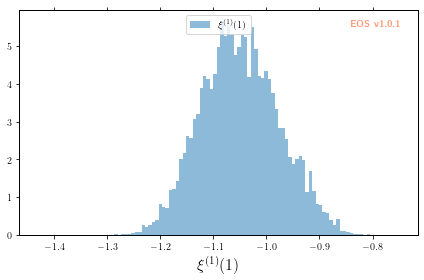

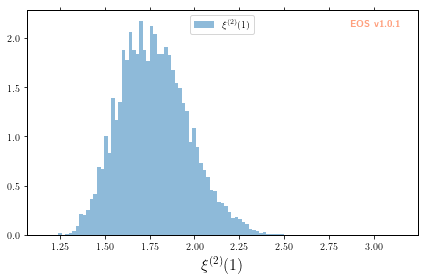

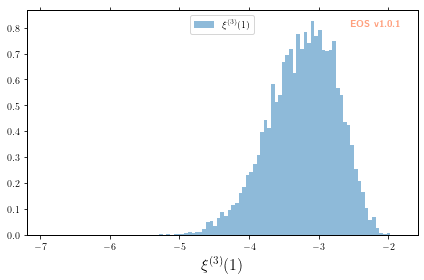

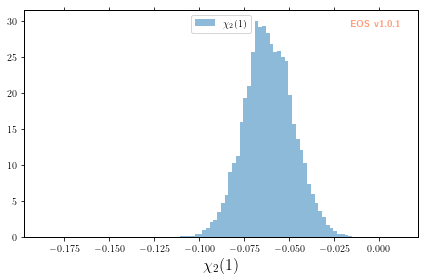

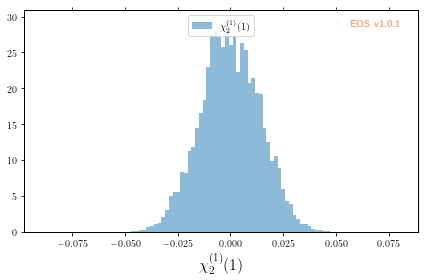

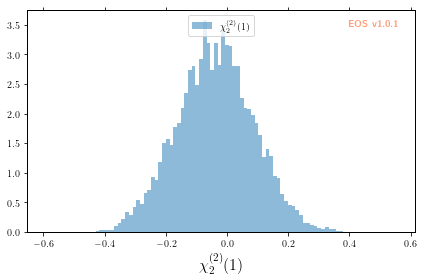

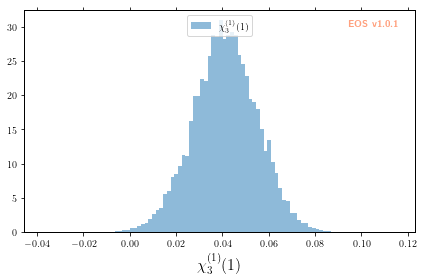

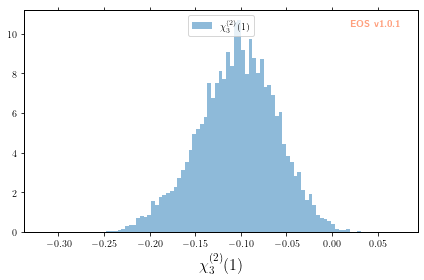

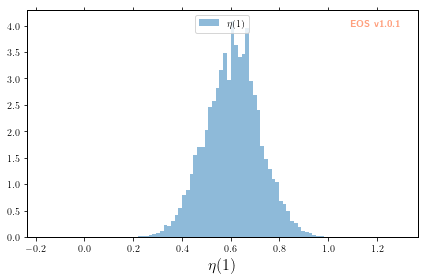

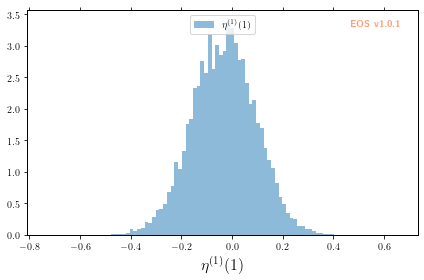

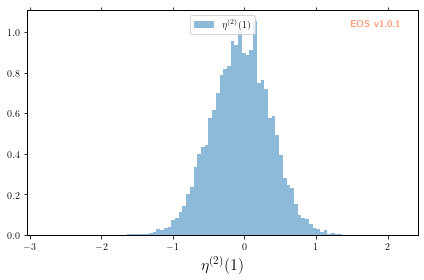

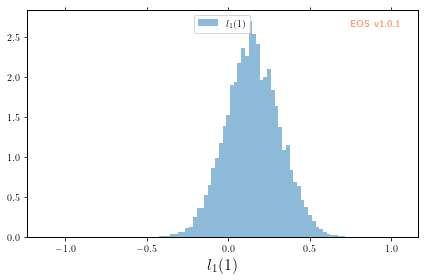

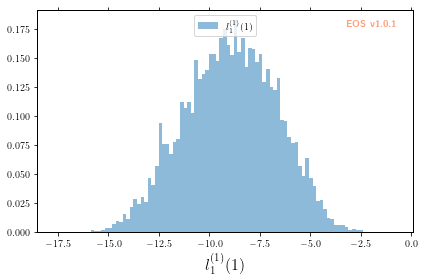

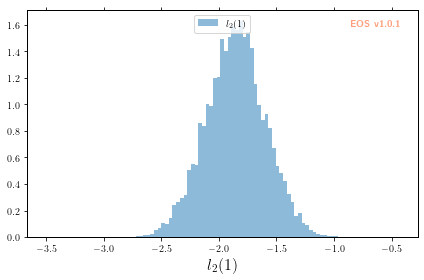

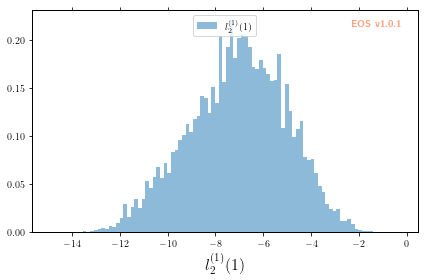

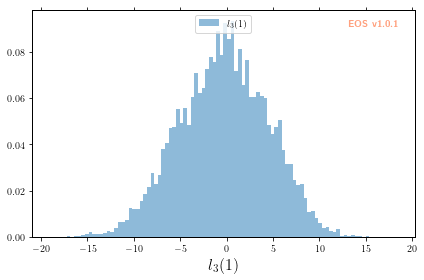

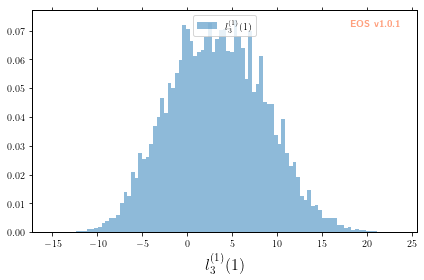

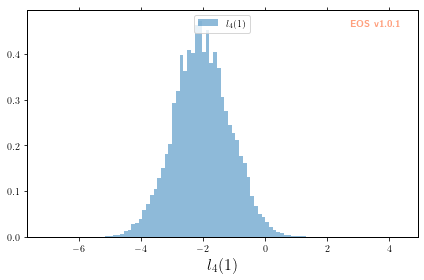

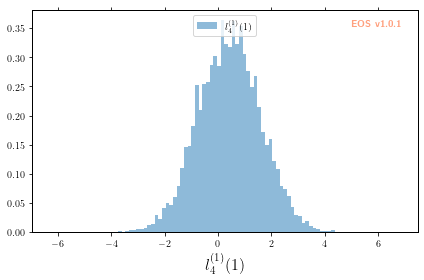

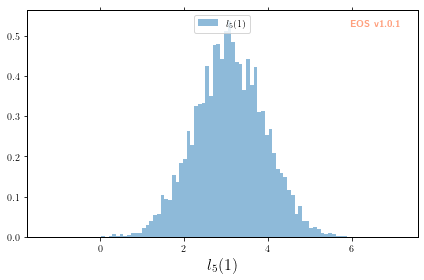

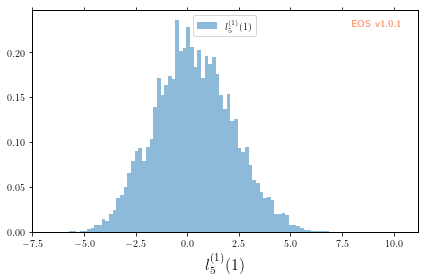

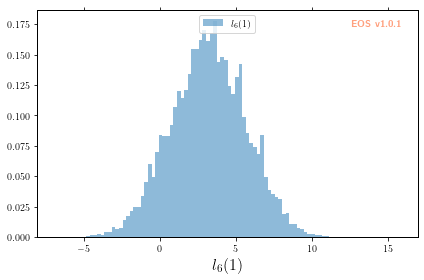

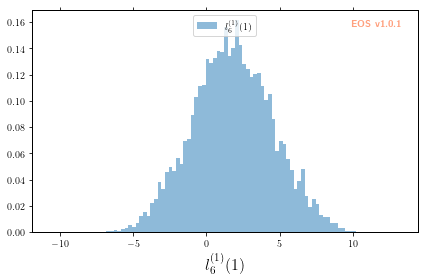

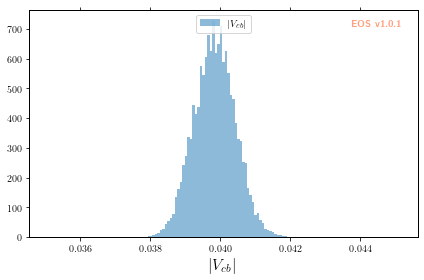

In [13]:
n_bins = 100
for i, p in enumerate(exp_analysis.varied_parameters[:]):
    print(f"i = {i}, parameter = {p.latex()}")
    print(f"    prior_min = {p.min()}, prior_max = {p.max()}")
    post_min = min(chains[:, i])
    post_max = max(chains[:, i])
    print(f"    1-dim min = {post_min:3.2f}, 1-dim max = {post_max:3.2f}" )
    if post_min < 0:
        post_min *= 1.05
    else:
        post_min *= 0.95
    if post_max < 0:
        post_max *= 0.95
    else:
        post_max *= 1.05
    print(f"    1-dim min = {post_min:3.2f}, 1-dim max = {post_max:3.2f}" )
    plot_args = {
        'plot': {
            'x': { 'label': f'{p.latex()}', 'range': [post_min,  post_max], 'format': '${x:.2f}$' },
            'legend': { 'location': 'upper center' }
        },
        'contents': [
            { 'label': f'{p.latex()}',
              'type': 'histogram', 'bins': n_bins,
              'data': { 'samples': chains[:, i], 'log_weights': log_posterior }}
        ]
    }
    eos.plot.Plotter(plot_args).plot()

### Compare Markov Chains for specific parameter
* 23 form factor parameters
* 4 Wilson coefficients

In [ ]:
x_val = list(range(len(mc_chains[0])))
len(x_val), len(mc_chains[0])

for p_ix, p in enumerate(exp_analysis.varied_parameters[:]):
    print(f"i = {p_ix}, parameter = {p.latex()}")
    
    plt.rcParams['figure.figsize'] = [30, 7]
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')

    for ch_ix, ch in enumerate(mc_chains):
        ax.scatter(x_val, ch[:, p_ix])

    fig.tight_layout()
    ax.set(ylabel=p.latex())
    plt.legend(loc="upper left", labels = range(len(mc_chains)))

In [ ]:
for p_ix, p in enumerate(exp_analysis.varied_parameters[:]):
    print(f"i = {p_ix:2d}, parameter = {p.latex()}")
    print(f"    prior_min = {p.min():5.2f}, prior_max = {p.max():5.2f}")
    prio_min = p.min()
    prio_max = p.max()
    post_min = min(chains[:, p_ix])
    post_max = max(chains[:, p_ix])
    print(f"    1-dim min = {post_min:5.2f}, 1-dim max = {post_max:5.2f}" )
    if post_min < 0:
        post_min *= 1.05
    else:
        post_min *= 0.95
    if post_max < 0:
        post_max *= 0.95
    else:
        post_max *= 1.05
    print(f"    1-dim min = {post_min:5.2f}, 1-dim max = {post_max:5.2f}" )
    cont_lst = []
    for ch_ix, ch, post in  zip(range(len(mc_chains)), mc_chains, mc_posterior):
        res = { 'label': f'{ch_ix}',
                'type' : 'histogram', 'bins': 80,
                'data' : { 'samples': ch[:, ch_ix], 'log_weights': post }}
        cont_lst.append(res)
    plot_args = {
        'plot': {
            'x': { 'label': f'{p.latex()}', 'range': [prio_min,  prio_max], 'format': '${x:.2f}$' },
            'legend': { 'location': 'upper center' }
        },
        'contents': cont_lst
    }
    plt.rcParams['figure.figsize'] = [6, 4]
    eos.plot.Plotter(plot_args).plot()

# PMC fit

In [25]:
from pypmc.mix_adapt.r_value import make_r_gaussmix

proposal_density = make_r_gaussmix(mc_chains, K_g=hc_K_g, critical_r=hc_r_crit)
print(f"Number of components  = {len(proposal_density.components)} for r_crit = {hc_r_crit} and K_g = {hc_K_g}")
print(f"Weights of components = {proposal_density.weights}")

Number of components  = 25 for r_crit = 1.3 and K_g = 5
Weights of components = [0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]


In [26]:
%%time

res = exp_analysis.sample_pmc(proposal_density, step_N=pmc_step_N, steps=pmc_steps, final_N=pmc_final_N)

Adaptions:   0%|          | 0/15 [00:00<?, ?it/s]INFO:EOS:Perplexity of the last samples after sampling in step 0: 0.10311221999997576
INFO:EOS:Perplexity of all previous samples after sampling in step 0: 0.10311221999997576
Adaptions:   7%|▋         | 1/15 [21:28<5:00:33, 1288.07s/it]

Could not update component 22 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 1: 0.3689154003014493
INFO:EOS:Perplexity of all previous samples after sampling in step 1: 0.19635522827433066
Adaptions:  13%|█▎        | 2/15 [42:30<4:35:49, 1273.00s/it]INFO:EOS:Perplexity of the last samples after sampling in step 2: 0.414822460095863
INFO:EOS:Perplexity of all previous samples after sampling in step 2: 0.2523350693946937
Adaptions:  20%|██        | 3/15 [1:03:52<4:15:25, 1277.15s/it]

Could not update component 16 --> weight is set to zero.
Could not update component 17 --> weight is set to zero.
Could not update component 18 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 3: 0.4210041030084741
INFO:EOS:Perplexity of all previous samples after sampling in step 3: 0.28695306490914174
Adaptions:  27%|██▋       | 4/15 [1:25:37<3:56:07, 1287.91s/it]

Could not update component 9 --> weight is set to zero.
Could not update component 15 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 4: 0.4226920339596734
INFO:EOS:Perplexity of all previous samples after sampling in step 4: 0.3105090622264005
Adaptions:  33%|███▎      | 5/15 [1:46:31<3:32:36, 1275.68s/it]

Could not update component 7 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 5: 0.45111000804962986
INFO:EOS:Perplexity of all previous samples after sampling in step 5: 0.33035962191085755
Adaptions:  40%|████      | 6/15 [2:07:22<3:10:07, 1267.51s/it]

Could not update component 7 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 6: 0.4568842000872629
INFO:EOS:Perplexity of all previous samples after sampling in step 6: 0.3461192928747738
Adaptions:  47%|████▋     | 7/15 [2:28:14<2:48:20, 1262.51s/it]

Could not update component 5 --> weight is set to zero.
Could not update component 6 --> weight is set to zero.
Could not update component 7 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 7: 0.4796394625512455
INFO:EOS:Perplexity of all previous samples after sampling in step 7: 0.3603906639909143
Adaptions:  53%|█████▎    | 8/15 [2:49:05<2:26:51, 1258.72s/it]INFO:EOS:Perplexity of the last samples after sampling in step 8: 0.480687438807084
INFO:EOS:Perplexity of all previous samples after sampling in step 8: 0.3721257851871717
Adaptions:  60%|██████    | 9/15 [3:09:56<2:05:38, 1256.43s/it]INFO:EOS:Perplexity of the last samples after sampling in step 9: 0.5012142250692179
INFO:EOS:Perplexity of all previous samples after sampling in step 9: 0.38342998707716186
Adaptions:  67%|██████▋   | 10/15 [3:30:50<1:44:38, 1255.63s/it]

Could not update component 6 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 10: 0.503631525532497
INFO:EOS:Perplexity of all previous samples after sampling in step 10: 0.39315809095272725
Adaptions:  73%|███████▎  | 11/15 [3:51:43<1:23:39, 1254.89s/it]INFO:EOS:Perplexity of the last samples after sampling in step 11: 0.5145147495476503
INFO:EOS:Perplexity of all previous samples after sampling in step 11: 0.40211175625723883
Adaptions:  80%|████████  | 12/15 [4:14:27<1:04:24, 1288.03s/it]INFO:EOS:Perplexity of the last samples after sampling in step 12: 0.5258737108190094
INFO:EOS:Perplexity of all previous samples after sampling in step 12: 0.41047856933268567
Adaptions:  87%|████████▋ | 13/15 [4:37:19<43:46, 1313.33s/it]  

Could not update component 6 --> weight is set to zero.
Could not update component 7 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 13: 0.5212809229856178
INFO:EOS:Perplexity of all previous samples after sampling in step 13: 0.4176002491877882
Adaptions:  93%|█████████▎| 14/15 [5:00:45<22:21, 1341.25s/it]INFO:EOS:Perplexity of the last samples after sampling in step 14: 0.5313361496389548
INFO:EOS:Perplexity of all previous samples after sampling in step 14: 0.42438233925775204
INFO:EOS:Perplexity after final samples: 0.5329953054043105   


CPU times: user 5d 1h 43min 13s, sys: 15min 40s, total: 5d 1h 58min 54s
Wall time: 10h 2min 4s


In [27]:
res[0].shape, res[1].shape, type(res[2])

((400000, 24), (400000,), pypmc.density.mixture.MixtureDensity)

### Save PMC data

In [28]:
pmc_data = res[0]
pmc_posterior = res[1]

df_pmc = pd.DataFrame(pmc_data, columns=parameter_names)
df_pmc['posterior'] = pmc_posterior
df_pmc['log_posterior'] = np.log(pmc_posterior)

fn = os.path.join(proj_path, data_path, data_pmc_file_name)
df_pmc.to_csv(fn, index=False)

/tmp/ipykernel_4114/77153061.py:6: RuntimeWarning: divide by zero encountered in log
  df_pmc['log_posterior'] = np.log(pmc_posterior)


i = 0, parameter = $\xi^{(1)}(1)$
    prior_min = -2.0, prior_max = -0.2
    1-dim min = -1.41, 1-dim max = -0.69
    1-dim min = -1.48, 1-dim max = -0.65
i = 1, parameter = $\xi^{(2)}(1)$
    prior_min = -0.2, prior_max = 4.0


    1-dim min = 0.76, 1-dim max = 2.92
    1-dim min = 0.72, 1-dim max = 3.06
i = 2, parameter = $\xi^{(3)}(1)$
    prior_min = -10.0, prior_max = 0.5


    1-dim min = -6.32, 1-dim max = -0.91
    1-dim min = -6.64, 1-dim max = -0.87
i = 3, parameter = $\chi_2(1)$
    prior_min = -0.26, prior_max = 0.14


    1-dim min = -0.16, 1-dim max = 0.03
    1-dim min = -0.16, 1-dim max = 0.03
i = 4, parameter = $\chi^{(1)}_2(1)$
    prior_min = -0.21, prior_max = 0.19
    1-dim min = -0.09, 1-dim max = 0.09
    1-dim min = -0.10, 1-dim max = 0.10
i = 5, parameter = $\chi^{(2)}_2(1)$
    prior_min = -1.2, prior_max = 1.2


    1-dim min = -0.73, 1-dim max = 0.77
    1-dim min = -0.77, 1-dim max = 0.81
i = 6, parameter = $\chi^{(1)}_3(1)$
    prior_min = -0.16, prior_max = 0.24


    1-dim min = -0.04, 1-dim max = 0.13
    1-dim min = -0.04, 1-dim max = 0.14
i = 7, parameter = $\chi^{(2)}_3(1)$
    prior_min = -0.5, prior_max = 0.3


    1-dim min = -0.36, 1-dim max = 0.11
    1-dim min = -0.38, 1-dim max = 0.12
i = 8, parameter = $\eta(1)$
    prior_min = -0.39, prior_max = 1.81
    1-dim min = -0.11, 1-dim max = 1.32
    1-dim min = -0.12, 1-dim max = 1.39


i = 9, parameter = $\eta^{(1)}(1)$
    prior_min = -1.76, prior_max = 1.64
    1-dim min = -0.82, 1-dim max = 0.82
    1-dim min = -0.86, 1-dim max = 0.86


i = 10, parameter = $\eta^{(2)}(1)$
    prior_min = -3.0, prior_max = 3.0
    1-dim min = -2.72, 1-dim max = 2.26
    1-dim min = -2.85, 1-dim max = 2.37
i = 11, parameter = $l_1(1)$
    prior_min = -1.3, prior_max = 1.5


    1-dim min = -0.88, 1-dim max = 1.22
    1-dim min = -0.92, 1-dim max = 1.28
i = 12, parameter = $l^{(1)}_1(1)$
    prior_min = -45.0, prior_max = 22.0


    1-dim min = -19.89, 1-dim max = 2.24
    1-dim min = -20.88, 1-dim max = 2.35
i = 13, parameter = $l_2(1)$
    prior_min = -4.0, prior_max = 0.0


    1-dim min = -3.55, 1-dim max = -0.24
    1-dim min = -3.73, 1-dim max = -0.23
i = 14, parameter = $l^{(1)}_2(1)$
    prior_min = -35.0, prior_max = 25.0


    1-dim min = -17.24, 1-dim max = 1.55
    1-dim min = -18.10, 1-dim max = 1.62
i = 15, parameter = $l_3(1)$
    prior_min = -20.0, prior_max = 20.0


    1-dim min = -26.91, 1-dim max = 23.01
    1-dim min = -28.25, 1-dim max = 24.16
i = 16, parameter = $l^{(1)}_3(1)$
    prior_min = -30.0, prior_max = 40.0


    1-dim min = -25.17, 1-dim max = 32.86
    1-dim min = -26.43, 1-dim max = 34.50
i = 17, parameter = $l_4(1)$
    prior_min = -10.0, prior_max = 7.0
    1-dim min = -7.91, 1-dim max = 3.65


    1-dim min = -8.31, 1-dim max = 3.83
i = 18, parameter = $l^{(1)}_4(1)$
    prior_min = -12.0, prior_max = 12.0


    1-dim min = -6.74, 1-dim max = 8.35
    1-dim min = -7.08, 1-dim max = 8.76
i = 19, parameter = $l_5(1)$
    prior_min = -10.0, prior_max = 16.0


/usr/local/lib/python3.8/site-packages/eos/plot/plotter.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig, self.ax = plt.subplots()


    1-dim min = -2.42, 1-dim max = 8.44
    1-dim min = -2.54, 1-dim max = 8.86
i = 20, parameter = $l^{(1)}_5(1)$
    prior_min = -13.0, prior_max = 16.0
    1-dim min = -10.05, 1-dim max = 10.93
    1-dim min = -10.55, 1-dim max = 11.48
i = 21, parameter = $l_6(1)$
    prior_min = -15.0, prior_max = 20.0


    1-dim min = -11.30, 1-dim max = 16.61
    1-dim min = -11.87, 1-dim max = 17.44
i = 22, parameter = $l^{(1)}_6(1)$
    prior_min = -20.0, prior_max = 20.0


    1-dim min = -15.90, 1-dim max = 16.77
    1-dim min = -16.70, 1-dim max = 17.61


i = 23, parameter = $|V_{cb}|$
    prior_min = 0.03, prior_max = 0.05
    1-dim min = 0.04, 1-dim max = 0.04
    1-dim min = 0.03, 1-dim max = 0.05


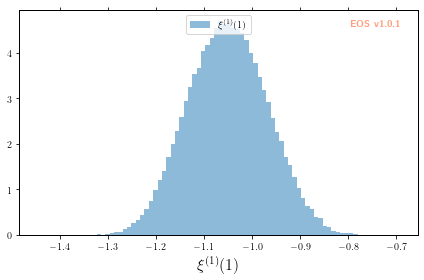

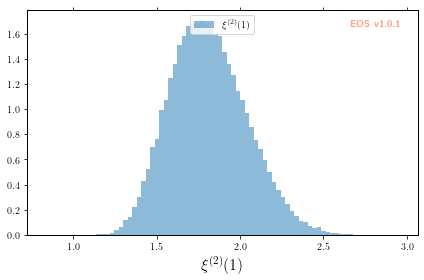

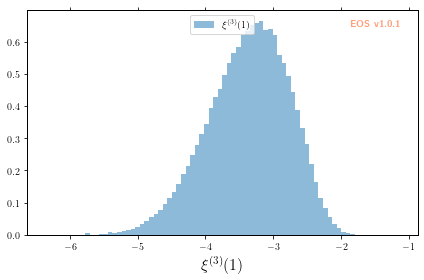

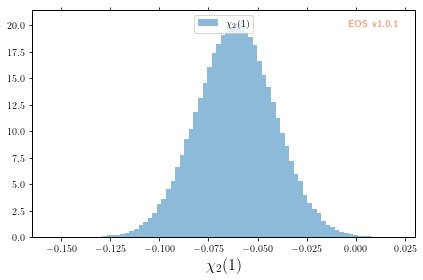

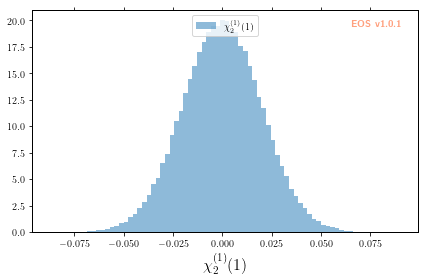

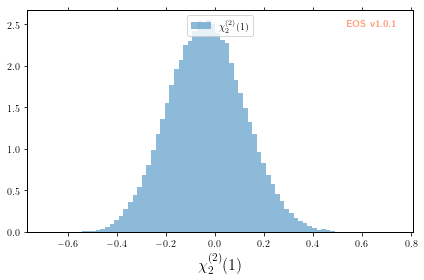

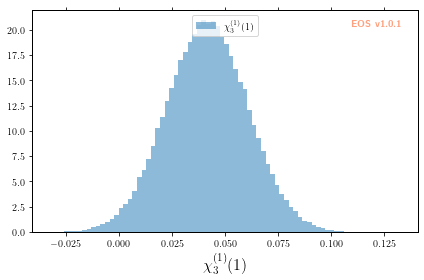

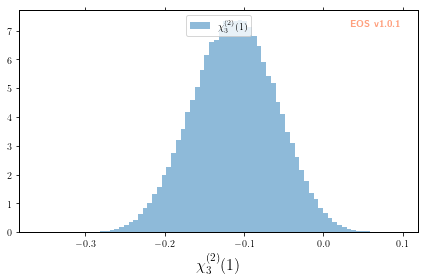

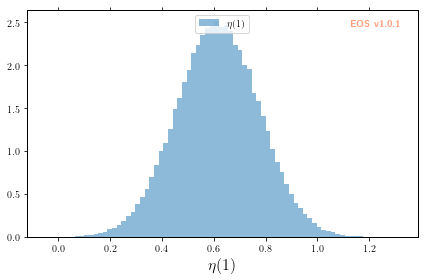

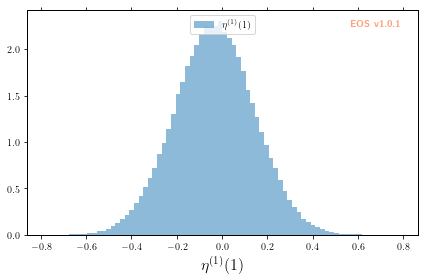

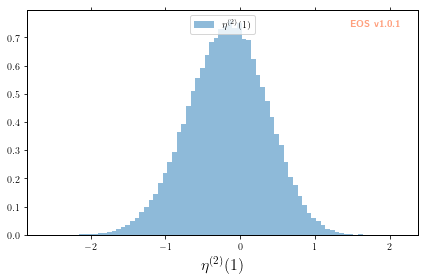

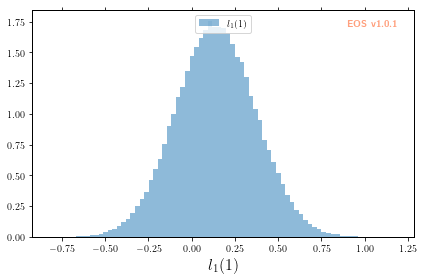

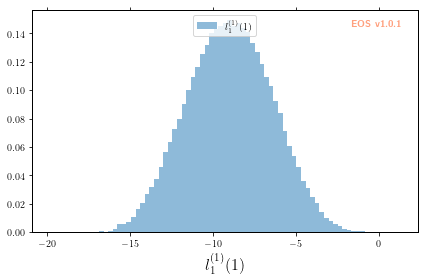

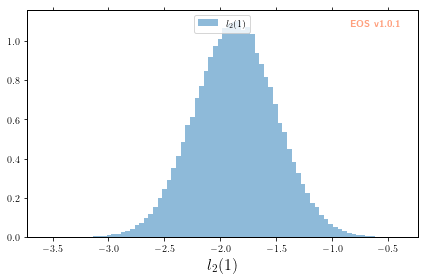

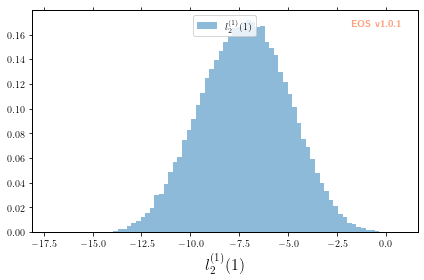

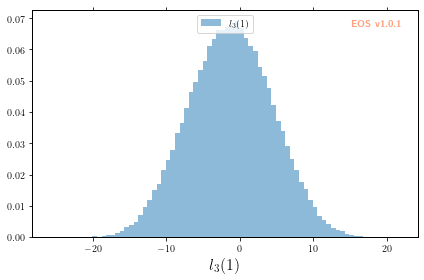

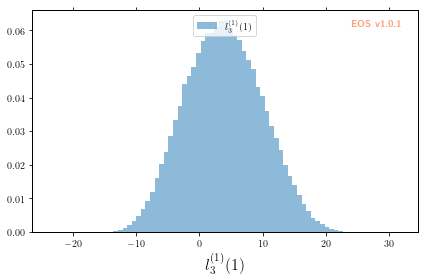

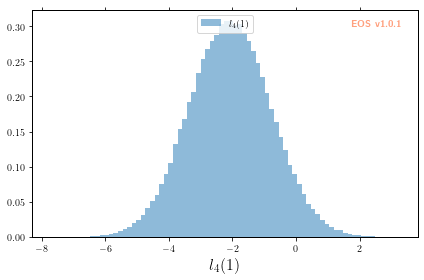

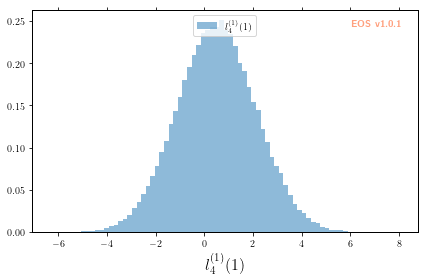

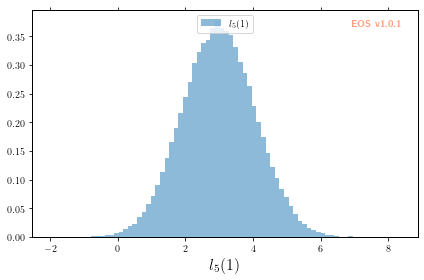

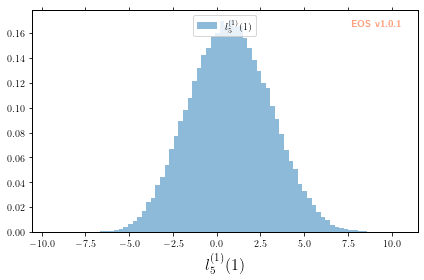

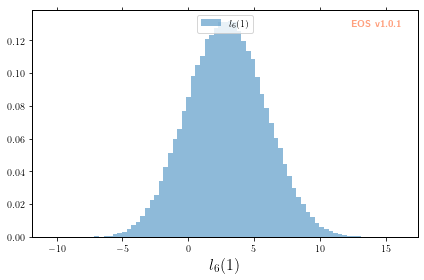

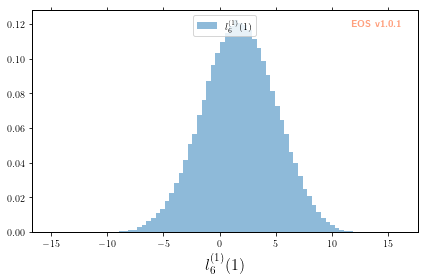

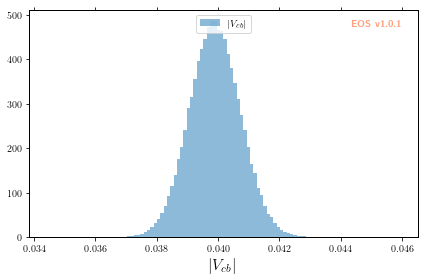

In [29]:
n_bins = 120
for i, p in enumerate(exp_analysis.varied_parameters[:]):
    print(f"i = {i}, parameter = {p.latex()}")
    print(f"    prior_min = {p.min()}, prior_max = {p.max()}")
    post_min = min(pmc_data[:, i])
    post_max = max(pmc_data[:, i])
    print(f"    1-dim min = {post_min:3.2f}, 1-dim max = {post_max:3.2f}" )
    if post_min < 0:
        post_min *= 1.05
    else:
        post_min *= 0.95
    if post_max < 0:
        post_max *= 0.95
    else:
        post_max *= 1.05
    print(f"    1-dim min = {post_min:3.2f}, 1-dim max = {post_max:3.2f}" )
    plot_args = {
        'plot': {
            'x': { 'label': f'{p.latex()}', 'range': [post_min,  post_max], 'format': '${x:.2f}$' },
            'legend': { 'location': 'upper center' }
        },
        'contents': [
            { 'label': f'{p.latex()}',
              'type': 'histogram', 'bins': 80,
              'data': { 'samples': pmc_data[:, i], 'weights': pmc_posterior }}
        ]
    }
    plt.rcParams['figure.figsize'] = [6, 4]
    eos.plot.Plotter(plot_args).plot()

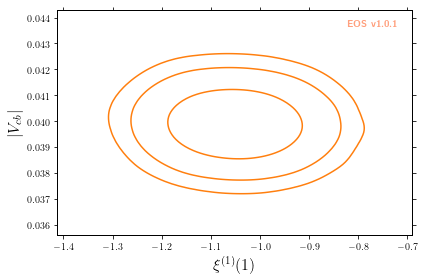

In [30]:
p_i = 1-1
p_j = 24-1
params = exp_analysis.varied_parameters
min_i, max_i = min(pmc_data[:, p_i]), max(pmc_data[:, p_i])
min_j, max_j = min(pmc_data[:, p_j]), max(pmc_data[:, p_j])
plot_args = {
    'plot': {
         'x': { 'label': params[p_i].latex(), 'range': [min_i, max_i], 'format': '${x:.2f}$' },
         'y': { 'label': params[p_j].latex(), 'range': [min_j, max_j], 'format': '${x:.2f}$' },
    },
    'contents': [
         {
            'type': 'kde2D', 'color': 'C1', 'label': 'posterior',
             'range': [min_i, max_i], 'levels': [68, 95, 99], 'bandwidth': 3,
             'data': { 'samples': pmc_data[:, (p_i, p_j)], 'weights': pmc_posterior }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()